# Figures Related to Simulating SDSS- and HST-based Surveys Using S4G Galaxies

## Requirements

This notebook is meant to be run within the full **s4g_barfractions** repository, including the associated Python modules and data files.

In addition, this notebook requires, directly or indirectly, the following Python packages:
   * numpy
   * matplotlib

By default, output PDF figure files are *not* saved to disk; to enable this, set the `savePlots` variable in the **Setup** cell to `True` and change the `plotDir` variable (same cell) to point to where you want the figures saved.

## Background

Two approaches to simulating bar detection in surveys of galaxies:

1. Simulate SDSS-style surveys: thousands of galaxies observed with typical SDSS seeing (FWHM = 1.4 arcsec), assuming that galaxies are uniformly distributed (by volume) in some nearby redshift range (e.g., $z = 0.01-0.05$).

2. Simulate *HST*-style surveys: 1000 galaxies observed in HST $I$-band (FWHM = 0.09 arcsec) at various redshift ranges (e.g., $z = 0.60-0.80$). This is less correct than the SDSS-style surveys simulation, because I don't do a proper cosmological correction for the redshift volumes. However, for $z < 1$ and the relatively crude, illustrative purposes of these simulation, it's probably not *too* wrong.

Galaxies are randomly sampled (with replacement) from distance-limited (or mass- and distance-limited) subsamples of the S4G-based Parent Spiral Sample. Each galaxy is given a random inclination (weighted by cos $i$) and a random bar orientation. Bars are considered "detected" if their observed (projected) semi-major axis is $> 2 \times \mathrm{FWHM}$.

(See Section 5 of the paper for more details.)

Simulations used the code in `simulate_surveys.py`, with the specific simulations for these figures
generated by the `make_simulated_surveys.py` script, which created the output "data" files in the `data/` subdirectory.

## Setup

In [1]:
import plotutils as pu
import datautils as du
import s4gutils


# paths for locating data, saving plots, etc.
dataDir = "./data/"
simDir = dataDir
fbarLitDir = dataDir + "f_bar_trends-from-literature/"
# change the following if you want to save the figures somewhere convenient
baseDir = "/Users/erwin/Documents/Working/Paper-s4gbars/"
plotDir = baseDir + "plots/"
savePlots = False

s4gdata = du.ReadCompositeTable(dataDir + "s4gbars_table.dat", columnRow=25, dataFrame=True)
nDisksTotal = len(s4gdata.name)


# axis labels, etc., for plots
xtmstar = r"$\log \: (M_{\star} / M_{\odot})$"
xtfgas = r"$\log \: (M_{\rm HI} / M_{\star})$"
ytfbar = r"Bar Fraction $f_{\rm bar}$"

ss1 = r"S$^{4}$G: $D \leq 25$ Mpc"
ss1m = r"S$^{4}$G: $D \leq 25$ Mpc, $\log M_{\star} \geq 8.5$"

In [11]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

# kludge to fix matplotlib's font_manager bug which mistakenly ID's "Times New Roman Bold.ttf" as
# indicating a "roman" (i.e., "normal") weight
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

Populating the interactive namespace from numpy and matplotlib


### Defining different subsamples via index vectors

Lists of integers defining indices of galaxies in Parent Disc Sample which meet various criteria
that define specific subsamples.

In [12]:
# general subsamples: all barred, all unbarred, all spirals
ii_barred = [i for i in range(nDisksTotal) if s4gdata.sma[i] > 0]
ii_unbarred = [i for i in range(nDisksTotal) if s4gdata.sma[i] <= 0]
ii_spirals = [i for i in range(nDisksTotal) if s4gdata.t_s4g[i] > -0.5]


# Sample 1: spirals with D < 25 Mpc -- 663 spirals: 373 barred, 290 unbarred
ii_all_limited1 = [i for i in ii_spirals if s4gdata.dist[i] <= 25]
ii_barred_limited1 = [i for i in ii_all_limited1 if i in ii_barred]
ii_unbarred_limited1 = [i for i in ii_all_limited1 if i not in ii_barred]


# Sample 1m: spirals with D < 25 Mpc and log Mstar >= 8.5 -- 576 spirals: 356 barred, 220 unbarred
ii_all_limited1_m8_5 = [i for i in ii_all_limited1 if s4gdata.logmstar[i] >= 8.5]
ii_barred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred]
ii_unbarred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_barred]

### Load Published Bar Frequencies

In [13]:
# Published f(bar) vs logMstar: Masters+2012, Melvin+2012, Oh+2012, Gavazzi+2015
logmstar_m12,fbar_m12 = s4gutils.Read2ColumnProfile(fbarLitDir+"fbar-vs-logMstar_masters+2012.txt")
logmstar_m14,fbar_m14 = s4gutils.Read2ColumnProfile(fbarLitDir+"fbar-vs-logMstar_melvin+2014.txt")
logmstar_oh12,fbar_oh12 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logMstar_oh+2012.txt")
logmstar_g15,fbar_g15 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logmstar_gavazzi+2015.txt")
logmstar_na10,fbar_na10 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logMstar_nair-abraham2010.txt")

# Published f(bar) vs log(f_gas): Masters+2012
logfgas_m12,fbar_m12_fgas = s4gutils.Read2ColumnProfile(fbarLitDir+"fbar-vs-logfgas_masters+2012.txt")


# Published f(bar) vs log(M_star) at high redshifts: Sheth+2008
def ReadSheth08( fname ):
    dlines = [line for line in open(fname) if line[0] != "#"]
    logMstar = np.array([float(line.split()[0]) for line in dlines])
    nBar = [int(line.split()[1]) for line in dlines]
    nTot = [int(line.split()[2]) for line in dlines]
    f = []
    sig_low = []
    sig_high = []
    for i in range(len(logMstar)):
        p, sig_minus, sig_plus = astrostat.Binomial(nBar[i], nTot[i])
        f.append(p)
        sig_low.append(sig_minus)
        sig_high.append(sig_plus)
    return (logMstar, np.array(f), np.array(sig_low), np.array(sig_high))

logmstar_s08h,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_highz.txt")

## Simulated SDSS Surveys

### I. Bar Fraction vs Stellar Mass

### Figure 10 (left panel): bar frequencies vs log $M_{\star}$

['GZ2: Masters+2012', 'GZ2: Melvin+2014', 'Oh+2012', 'Gavazzi+2015', 'N&A 2010', 'S$^{4}$G: $D \\leq 25$ Mpc', 'S$^{4}$G: Simulated SDSS obs']


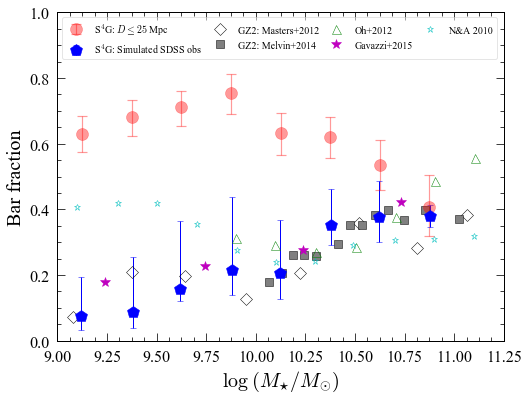

In [15]:
sim_d30_mstar = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_SDSS_200_dp-sizes.txt", columnRow=0, dataFrame=True)

# Plot for paper
plt.plot(logmstar_m12, fbar_m12, 'D', mfc="None",mec='k', ms=9,label='GZ2: Masters+2012')
plt.plot(logmstar_m14, fbar_m14, 's', mfc="0.5",mec='k', ms=8,label='GZ2: Melvin+2014')
plt.plot(logmstar_oh12, fbar_oh12, '^', mfc="None",mec='g', ms=9,label='Oh+2012')
plt.plot(logmstar_g15,fbar_g15, 'm*', ms=10.5,label='Gavazzi+2015')
plt.plot(logmstar_na10, fbar_na10, '*', mfc="None",mec='c', ms=7,label='N&A 2010')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.25, 0.25, fmt='ro', ms=12, noErase=True, alpha=0.4,label=ss1)
plt.errorbar(sim_d30_mstar.logMstar, sim_d30_mstar.medFbar, yerr=[sim_d30_mstar.sigma_low, sim_d30_mstar.sigma_high], fmt='bp', ms=12, label=r'S$^{4}$G: Simulated SDSS obs')
plt.ylim(0,1);plt.xlim(9,11.25)
plt.xlabel(xtmstar)
plt.ylabel('Bar fraction')

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
print(labels)
handles = [handles[5], handles[6], handles[0], handles[1], handles[2], handles[3], handles[4]]
labels = [labels[5], labels[6], labels[0], labels[1], labels[2], labels[3], labels[4]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=4, columnspacing=0.75, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)

if savePlots: plt.savefig(plotDir+"fbar-vs-mass-sim.pdf")

### II. Bar Fraction vs Gas Mass Fraction

Note that the simulations use a subset of S4G galaxies with $\log M_{\star} > 9.5$, to better match the GZ2 subsample of Masters et al. (2012).

### Figure 10 (right panel): bar frequencies vs $f_{\rm gas}$

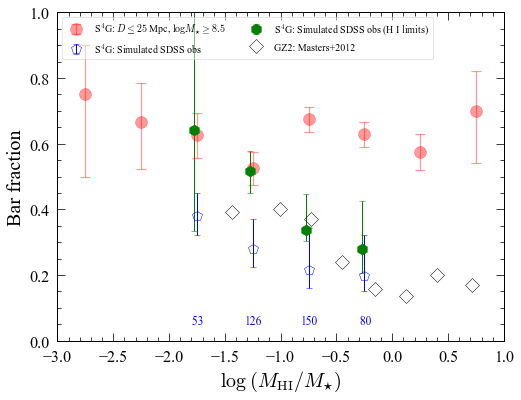

In [16]:
# Using D <= 30 dataset as parent sample to observe
# First is deprojected bar sizes, no H I selection
# Second uses observed bar sizes + approx. ALFALFA H I limits
sim_d30_fgas = du.ReadCompositeTable(simDir+"sim_logfgas_d30_2xfwhm_SDSS_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_d30_fgas_hilimit = du.ReadCompositeTable(simDir+"sim_logfgas_d30m95_sp_2xfwhm_SDSS_200_HI-limited.txt", columnRow=0, dataFrame=True)



# Published f(bar) vs log(f_gas)
plt.plot(logfgas_m12, fbar_m12_fgas, 'D', mfc="None",mec='k', ms=10,label='GZ2: Masters+2012')

pu.PlotFrequency(s4gdata.logfgas, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -3,2,0.5, noErase=True, fmt='ro', ms=12, alpha=0.4, label=ss1m)
# Skip last bin of simulation results, since it's based on only six galaxies
plt.errorbar(sim_d30_fgas.log_fgas[:4], sim_d30_fgas.medFbar[:4], yerr=[sim_d30_fgas.sigma_low[:4], sim_d30_fgas.sigma_high[:4]], fmt='bp', mfc='None', mec='b', ms=11, label=r'S$^{4}$G: Simulated SDSS obs')
plt.errorbar(sim_d30_fgas_hilimit.log_fgas[:4] - 0.025, sim_d30_fgas_hilimit.medFbar[:4], yerr=[sim_d30_fgas_hilimit.sigma_low[:4], sim_d30_fgas_hilimit.sigma_high[:4]], fmt='gh', ms=11, label=r'S$^{4}$G: Simulated SDSS obs (H I limits)')
plt.xlabel(xtfgas);plt.ylabel('Bar fraction')
plt.ylim(0,1);plt.xlim(-3,1)

# plot number of galaxies in starting sample per bin
centers = [-1.82, -1.32, -0.82, -0.32]
counts = [53, 126, 150, 80]
for c,n in zip(centers, counts):
    text(c, 0.05, "%3d" % n, fontsize=11.5, color='b')

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[3], handles[0]]
labels = [labels[1], labels[2], labels[3], labels[0]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=2, framealpha=0.5)

# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-fgas-sim.pdf")

## Simulated HST Surveys

### Figure 12 (old): S4G seen at high redshift, full and half barsize, vs Sheth+2008 high-*z* trend

This is for the original version of the paper; it only simulates *HST* observations at $z = 0.75$

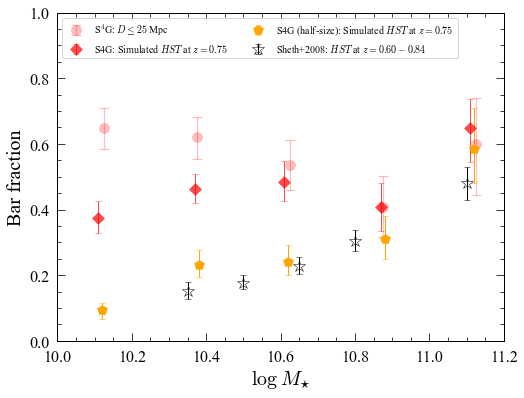

In [28]:
sim_hst_075 = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_075_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08h_v2,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_highz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$ at $z=0.75$'
plt.errorbar(sim_hst_075.logMstar - 0.01, sim_hst_075.medFbar, yerr=[sim_hst_075.sigma_low, sim_hst_075.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$ at $z=0.75$'
plt.errorbar(sim_hst_075_half.logMstar, sim_hst_075_half.medFbar, yerr=[sim_hst_075_half.sigma_low, sim_hst_z075_half.sigma_high], fmt='p', color='orange', ms=11, label=txthalf)

txts08 = r'Sheth+2008: $HST$ at $z = 0.60-0.84$'
plt.errorbar(logmstar_s08h, fbar_s08h, yerr=[sigma_low_s08h, sigma_high_s08h], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08)
plt.ylim(0,1);plt.xlim(10,11.2)
plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-high-z-with-sim.pdf")

Same, but using properly centered bins for Sheth+2008 data

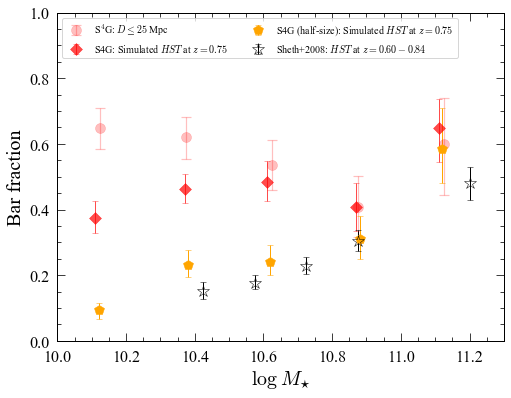

In [32]:
sim_hst_z075 = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_z075_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08h_v2,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_highz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$ at $z=0.75$'
plt.errorbar(sim_hst_z075.logMstar - 0.01, sim_hst_z075.medFbar, yerr=[sim_hst_z075.sigma_low, sim_hst_z075.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$ at $z=0.75$'
plt.errorbar(sim_hst_z075_half.logMstar, sim_hst_z075_half.medFbar, yerr=[sim_hst_z075_half.sigma_low, sim_hst_z075_half.sigma_high], fmt='p', color='orange', ms=11, label=txthalf)

txts08 = r'Sheth+2008: $HST$ at $z = 0.60-0.84$'
plt.errorbar(logmstar_s08h_v2, fbar_s08h, yerr=[sigma_low_s08h, sigma_high_s08h], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08)
plt.ylim(0,1);plt.xlim(10,11.3)
plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-high-z-with-sim.pdf")

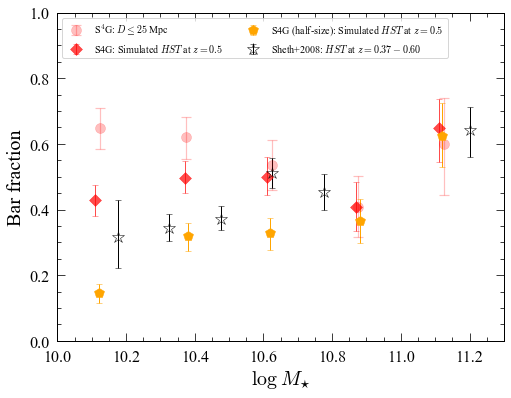

In [33]:
sim_hst_z05 = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.5_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_z05_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.5_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08h_v2,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_midz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$ at $z=0.5$'
plt.errorbar(sim_hst_z05.logMstar - 0.01, sim_hst_z05.medFbar, yerr=[sim_hst_z05.sigma_low, sim_hst_z05.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$ at $z=0.5$'
plt.errorbar(sim_hst_z05_half.logMstar, sim_hst_z05_half.medFbar, yerr=[sim_hst_z05_half.sigma_low, sim_hst_z05_half.sigma_high], fmt='p', color='orange', ms=11, label=txthalf)

txts08 = r'Sheth+2008: $HST$ at $z = 0.37-0.60$'
plt.errorbar(logmstar_s08h_v2, fbar_s08h, yerr=[sigma_low_s08h, sigma_high_s08h], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08)
plt.ylim(0,1);plt.xlim(10,11.3)
plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-mid-z-with-sim.pdf")

### Figure 12 (new): Using redshift ranges

These plots are for simulations using redshift ranges matching those of Sheth et al. (2008).

#### Top Panel: Redshifts 0.60-0.84

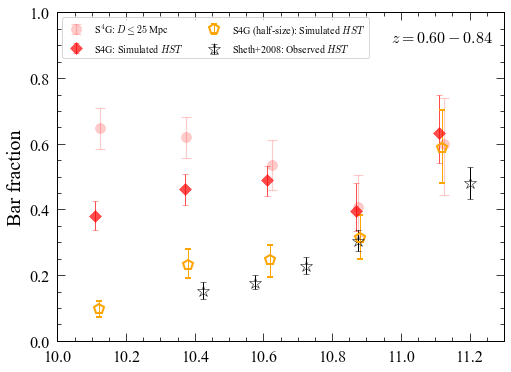

In [61]:
sim_hst_hi = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.60-0.84_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_hi_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.60-0.84_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08h_v2,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_highz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.2,label=ss1)
txtfull = 'S4G: Simulated $HST$'
plt.errorbar(sim_hst_hi.logMstar - 0.01, sim_hst_hi.medFbar, yerr=[sim_hst_hi.sigma_low, sim_hst_hi.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$'
plt.errorbar(sim_hst_hi_half.logMstar, sim_hst_hi_half.medFbar, yerr=[sim_hst_hi_half.sigma_low, sim_hst_hi_half.sigma_high], fmt='p', mfc='None', ecolor='orange', mec='orange', mew=2, ms=11, label=txthalf)

txts08 = r'Sheth+2008: Observed $HST$'
plt.errorbar(logmstar_s08h_v2, fbar_s08h, yerr=[sigma_low_s08h, sigma_high_s08h], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08)
plt.ylim(0,1);plt.xlim(10,11.3)
plt.text(10.97, 0.91, r'$z = 0.60-0.84$', fontsize=16)
#plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-high-z-with-sim2.pdf")

#### Middle Panel: Redshifts 0.37-0.60

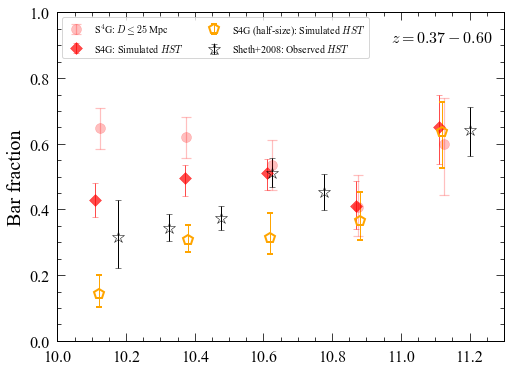

In [60]:
sim_hst_med = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.37-0.60_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_med_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.37-0.60_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08mm,fbar_s08mh,sigma_low_s08mh,sigma_high_s08mh = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_midz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$'
plt.errorbar(sim_hst_med.logMstar - 0.01, sim_hst_med.medFbar, yerr=[sim_hst_med.sigma_low, sim_hst_med.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$'
plt.errorbar(sim_hst_med_half.logMstar, sim_hst_med_half.medFbar, yerr=[sim_hst_med_half.sigma_low, sim_hst_med_half.sigma_high], fmt='p', mfc='None', ecolor='orange', mec='orange', mew=2, ms=11, label=txthalf)

txts08m = r'Sheth+2008: Observed $HST$'
plt.errorbar(logmstar_s08mm, fbar_s08mh, yerr=[sigma_low_s08mh, sigma_high_s08mh], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08m)
plt.ylim(0,1);plt.xlim(10,11.3)
plt.text(10.97, 0.91, r'$z = 0.37-0.60$', fontsize=16)
#plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-mid-z-with-sim2.pdf")

#### Bottom Panel: Redshifts 0.14-0.37

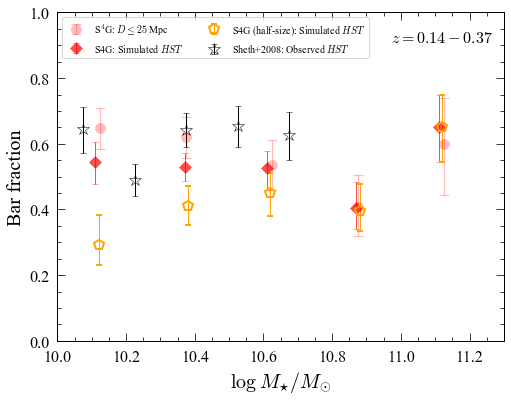

In [63]:
sim_hst_low = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.14-0.37_200_dp-sizes.txt", columnRow=0, dataFrame=True)
sim_hst_low_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.14-0.37_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

logmstar_s08lm,fbar_s08lh,sigma_low_s08lh,sigma_high_s08lh = ReadSheth08(fbarLitDir+"fbar-vs-logmstar_sheth+2008_counts_lowz_centered.txt")

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$'
plt.errorbar(sim_hst_low.logMstar - 0.01, sim_hst_low.medFbar, yerr=[sim_hst_low.sigma_low, sim_hst_low.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$'
plt.errorbar(sim_hst_low_half.logMstar, sim_hst_low_half.medFbar, yerr=[sim_hst_low_half.sigma_low, sim_hst_low_half.sigma_high], fmt='p', mfc='None', ecolor='orange', mec='orange', mew=2, ms=11, label=txthalf)

txts0m = r'Sheth+2008: Observed $HST$'
plt.errorbar(logmstar_s08lm, fbar_s08lh, yerr=[sigma_low_s08lh, sigma_high_s08lh], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts0m)
plt.ylim(0,1);plt.xlim(10,11.3)
plt.text(10.97, 0.91, r'$z = 0.14-0.37$', fontsize=16)
plt.xlabel(r"$\log \: M_{\star} / M_{\odot}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-mass-low-z-with-sim2.pdf")